### IMPORTANDO BIBLIOTECAS

In [75]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

### CARREGANDO DADOS

In [162]:
df_dados = pd.read_csv('kidneyData.csv',delimiter=',')

df_dados = df_dados.sample(frac=1) # sample retorna uma amostra aleatória de itens de um eixo de objeto, com uma fracao de itens do eixo.

potencia = 2

df_dados['target'] = df_dados['target']**potencia

# df_dados['y2'] = df_dados['y']**potencia

df_dados

,Unnamed: 0,image_id,path,diag,target,Class
3324,3324,Normal- (4582),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
12043,12043,Cyst- (1597),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
4932,4932,Normal- (2381),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
10831,10831,Cyst- (176),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
6501,6501,Normal- (1821),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
...,...,...,...,...,...,...
6309,6309,Normal- (1070),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Normal,1,Normal
8965,8965,Cyst- (860),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
1826,1826,Tumor- (230),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,9,Tumor
7518,7518,Stone- (16),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Stone,4,Stone


### INFORMAÇOES DOS DADOS

In [144]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12446 entries, 1435 to 1846
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 680.6+ KB


In [170]:
df_dados['diag'].value_counts() # value counts do total de tipos de imagens
#df_dados['image_id'].value_counts() # Value counts de diagnostico por imagem
#df_dados['target'].value_counts() # Value counts de target

Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: diag, dtype: int64

### VISUALIZANDO DADOS


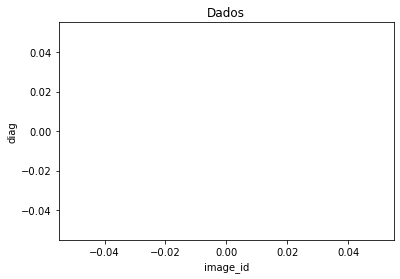

In [169]:
df_dados_c1 = df_dados[df_dados['image_id'] == 'C1']
df_dados_c2 = df_dados[df_dados['diag'] == 'C2']

plt.scatter(df_dados_c1['image_id'].array,df_dados_c1['image_id'].array,color='blue')
plt.scatter(df_dados_c2['diag'].array,df_dados_c2['diag'].array,color='red')
plt.title('Dados')
plt.xlabel('image_id')
plt.ylabel('diag')
plt.show()

### PREPARANDO DADOS

In [158]:
target = df_dados['path'].array

df_features = df_dados.drop(columns=['path'])
df_features

,Unnamed: 0,image_id,diag,target,Class
1435,1435,Tumor- (340),Tumor,9,Tumor
7171,7171,Normal- (2908),Normal,1,Normal
9993,9993,Cyst- (368),Cyst,0,Cyst
5455,5455,Normal- (1914),Normal,1,Normal
3541,3541,Normal- (332),Normal,1,Normal
...,...,...,...,...,...
10937,10937,Cyst- (1182),Cyst,0,Cyst
6182,6182,Normal- (2692),Normal,1,Normal
8977,8977,Cyst- (807),Cyst,0,Cyst
4780,4780,Normal- (14),Normal,1,Normal


### MATRIZ DE CONFUSÃO